In [1]:
from tensorflow.keras.datasets import boston_housing
import tensorflow as tf

bh = boston_housing.load_data()
bh

((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

In [2]:
(X_train, y_train),(X_test, y_test) = boston_housing.load_data()
print(len(X_train), len(y_train))
print(X_train.shape, y_train.shape)



404 404
(404, 13) (404,)


In [3]:
#정규화
x_mean = X_train.mean(axis=0)
x_std = X_train.std(axis=0)

# print(x_mean)
# print(x_std)

X_train -= x_mean
X_train /= x_std

X_test -= x_mean
X_test /= x_std



In [4]:
y_mean = y_train.mean(axis = 0)
y_std = y_train.std(axis=0)

y_train -= y_mean
y_train /= y_std

y_test -= y_mean
y_test /= y_std

print(X_train[0])
print(y_train[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 52, activation = 'relu', input_shape = (13, )),
    tf.keras.layers.Dense(units = 39, activation = "relu"),
    tf.keras.layers.Dense(units = 25, activation = "relu"),
    tf.keras.layers.Dense(units = 1)])

model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.07), loss = "mse")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 52)                728       
                                                                 
 dense_1 (Dense)             (None, 39)                2067      
                                                                 
 dense_2 (Dense)             (None, 25)                1000      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 3821 (14.93 KB)
Trainable params: 3821 (14.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
history = model.fit(X_train, y_train, epochs = 25, batch_size = 32, validation_split=0.25)


Epoch 1/25



10/10 [==============================] - 2s 58ms/step - loss: 0.7153 - val_loss: 0.8761
Epoch 2/25
10/10 [==============================] - 0s 13ms/step - loss: 0.4861 - val_loss: 0.6779
Epoch 3/25
10/10 [==============================] - 0s 13ms/step - loss: 0.3614 - val_loss: 0.5481
Epoch 4/25
10/10 [==============================] - 0s 12ms/step - loss: 0.2904 - val_loss: 0.4382
Epoch 5/25
10/10 [==============================] - 0s 11ms/step - loss: 0.2353 - val_loss: 0.3682
Epoch 6/25
10/10 [==============================] - 0s 10ms/step - loss: 0.2060 - val_loss: 0.3311
Epoch 7/25
10/10 [==============================] - 0s 18ms/step - loss: 0.1888 - val_loss: 0.3091
Epoch 8/25
10/10 [==============================] - 0s 12ms/step - loss: 0.1775 - val_loss: 0.2844
Epoch 9/25
10/10 [==============================] - 0s 13ms/step - loss: 0.1602 - val_loss: 0.2734
Epoch 10/25
10/10 [==============================] - 0s 9ms/step - loss: 0.1442 - val_loss: 0.2577
Epoch 11/25
10/10 [==

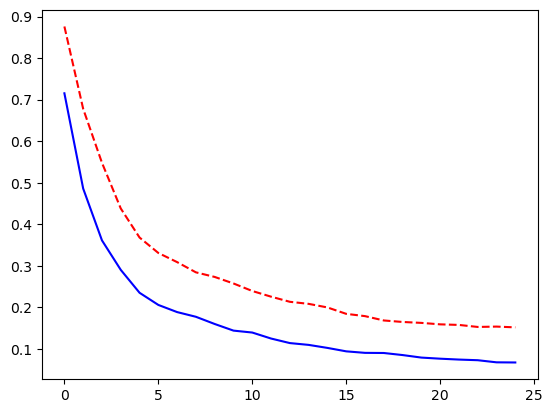

In [7]:
#손실그래프 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')
plt.show()

In [8]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.2436


0.2436480075120926

In [9]:
#입력층 units 32
#은닉층 units 16
#출력층 units 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation="relu", input_shape = (13, )),
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(units=1)])

model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.07), loss = "mse")
history = model.fit(X_train, y_train, epochs = 25, batch_size = 32, validation_split=0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 3, monitor = 'val_loss')])

Epoch 1/25
10/10 [==============================] - 2s 38ms/step - loss: 1.3344 - val_loss: 1.1812
Epoch 2/25
10/10 [==============================] - 0s 10ms/step - loss: 0.9036 - val_loss: 0.9520
Epoch 3/25
10/10 [==============================] - 0s 11ms/step - loss: 0.6614 - val_loss: 0.8054
Epoch 4/25
10/10 [==============================] - 0s 10ms/step - loss: 0.5245 - val_loss: 0.7045
Epoch 5/25
10/10 [==============================] - 0s 10ms/step - loss: 0.4391 - val_loss: 0.6251
Epoch 6/25
10/10 [==============================] - 0s 17ms/step - loss: 0.3815 - val_loss: 0.5544
Epoch 7/25
10/10 [==============================] - 0s 12ms/step - loss: 0.3339 - val_loss: 0.4881
Epoch 8/25
10/10 [==============================] - 0s 10ms/step - loss: 0.2967 - val_loss: 0.4381
Epoch 9/25
10/10 [==============================] - 0s 9ms/step - loss: 0.2692 - val_loss: 0.3986
Epoch 10/25
10/10 [==============================] - 0s 8ms/step - loss: 0.2466 - val_loss: 0.3678
Epoch 11/25

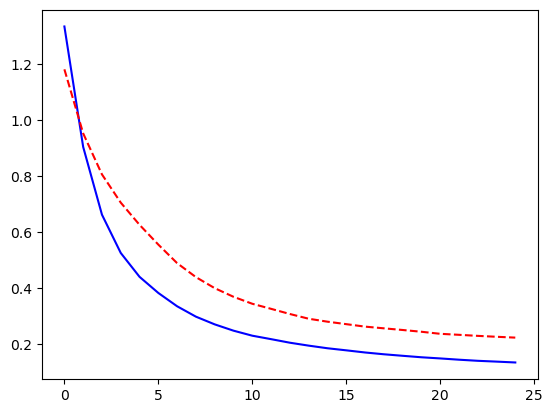

In [10]:
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')
plt.show()

4/4 [==============================] - 0s 3ms/step


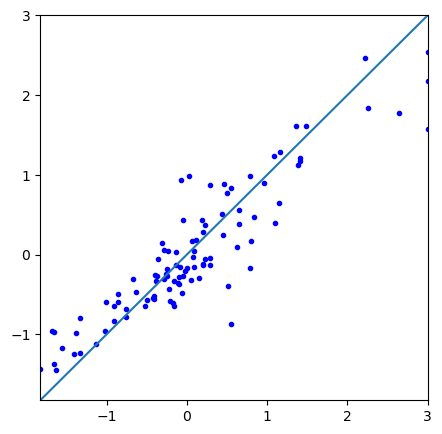

-1.825740279496296 3.0008527225512145


In [11]:
model.evaluate(X_test, y_test)
pred = model.predict(X_test)

plt.figure(figsize= (5, 5))
plt.plot(y_test, pred, 'b.')
plt.axis([min(y_test), max(y_test), min(y_test), max(y_test)])
#plt.axis() : x축과 y축의 범위 설정함수

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.show()


print(min(y_test),  max(y_test))
